In [142]:


import os
import numpy as np
# import torch

%matplotlib notebook
import matplotlib.pyplot as plt

from src.myutils import get_scenes_from_dir, make_dataset_from_scenes, MOTDataset_BBwise

import cv2
import torchvision


import ipywidgets as wdg  # Using the ipython notebook widgets


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
imgs = os.listdir('../Datasets/2DMOT2015/train/ADL-Rundle-6/img1/')

In [3]:
len(imgs)

525

In [4]:
train_scenes = get_scenes_from_dir('../Datasets/')

In [5]:
print(train_scenes)

['../Datasets/2DMOT2015/train/TUD-Campus', '../Datasets/2DMOT2015/train/PETS09-S2L1', '../Datasets/2DMOT2015/train/Venice-2', '../Datasets/2DMOT2015/train/KITTI-17', '../Datasets/2DMOT2015/train/TUD-Stadtmitte', '../Datasets/2DMOT2015/train/ETH-Sunnyday', '../Datasets/2DMOT2015/train/KITTI-13', '../Datasets/2DMOT2015/train/ADL-Rundle-6', '../Datasets/2DMOT2015/train/ETH-Pedcross2', '../Datasets/2DMOT2015/train/ETH-Bahnhof', '../Datasets/2DMOT2015/train/ADL-Rundle-8', '../Datasets/MOT2017/train/MOT17-09-FRCNN', '../Datasets/MOT2017/train/MOT17-05-FRCNN', '../Datasets/MOT2017/train/MOT17-13-FRCNN', '../Datasets/MOT2017/train/MOT17-02-FRCNN', '../Datasets/MOT2017/train/MOT17-10-DPM', '../Datasets/MOT2017/train/MOT17-11-DPM', '../Datasets/MOT2017/train/MOT17-13-DPM', '../Datasets/MOT2017/train/MOT17-09-DPM', '../Datasets/MOT2017/train/MOT17-11-SDP', '../Datasets/MOT2017/train/MOT17-10-SDP', '../Datasets/MOT2017/train/MOT17-05-DPM', '../Datasets/MOT2017/train/MOT17-02-SDP', '../Datasets/MOT

In [6]:
len(train_scenes)

32

In [7]:
train_scenes

['../Datasets/2DMOT2015/train/TUD-Campus',
 '../Datasets/2DMOT2015/train/PETS09-S2L1',
 '../Datasets/2DMOT2015/train/Venice-2',
 '../Datasets/2DMOT2015/train/KITTI-17',
 '../Datasets/2DMOT2015/train/TUD-Stadtmitte',
 '../Datasets/2DMOT2015/train/ETH-Sunnyday',
 '../Datasets/2DMOT2015/train/KITTI-13',
 '../Datasets/2DMOT2015/train/ADL-Rundle-6',
 '../Datasets/2DMOT2015/train/ETH-Pedcross2',
 '../Datasets/2DMOT2015/train/ETH-Bahnhof',
 '../Datasets/2DMOT2015/train/ADL-Rundle-8',
 '../Datasets/MOT2017/train/MOT17-09-FRCNN',
 '../Datasets/MOT2017/train/MOT17-05-FRCNN',
 '../Datasets/MOT2017/train/MOT17-13-FRCNN',
 '../Datasets/MOT2017/train/MOT17-02-FRCNN',
 '../Datasets/MOT2017/train/MOT17-10-DPM',
 '../Datasets/MOT2017/train/MOT17-11-DPM',
 '../Datasets/MOT2017/train/MOT17-13-DPM',
 '../Datasets/MOT2017/train/MOT17-09-DPM',
 '../Datasets/MOT2017/train/MOT17-11-SDP',
 '../Datasets/MOT2017/train/MOT17-10-SDP',
 '../Datasets/MOT2017/train/MOT17-05-DPM',
 '../Datasets/MOT2017/train/MOT17-02-

In [8]:
images = []
for i in train_scenes:
    images += [i+'/img1/'+j for j in os.listdir(i+'/img1')]

In [9]:
len(images)

21448

In [10]:
gt = np.empty((0,9))
for i in train_scenes:
    temp = np.loadtxt(i+'/gt/gt.txt', delimiter=',')
    if '2017' in i:
        keep_indices = np.where(([j in [1,2,7,8] for j in temp[:,-2]]))[0]
        temp = temp[keep_indices,:9]
    else:
        temp = temp[:,:9]
    gt = np.append(gt,temp, axis =0)


In [11]:
gt.shape

(432529, 9)

In [12]:
i

'../Datasets/MOT2017/train/MOT17-02-DPM'

(array([18581.,  1549.,     0.,     0.,     0.,     0.,     0.,     0.,
         5271.,  1200.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

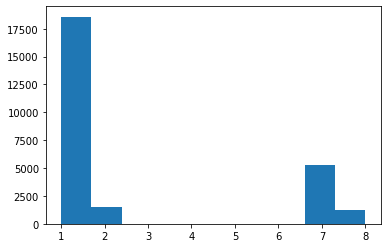

In [13]:
plt.hist(temp[:, -2])

In [14]:
i

'../Datasets/MOT2017/train/MOT17-02-DPM'

In [15]:
%timeit i = cv2.imread(images[0])

5.04 ms ± 49.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit img = cv2.cvtColor(cv2.imread(images[0], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

5.16 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
from PIL import Image
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

In [22]:
def cv_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
#     with open(path, 'rb') as f:
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [23]:
%timeit pil_loader(images[0])

5.97 ms ± 36.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
a = pil_loader(images[0])

In [26]:
%timeit cv_loader(images[0])

5.15 ms ± 302 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
images, gt, f_ids = make_dataset_from_scenes(train_scenes)

In [57]:
f_ids.astype(np.int)

array([    0,     0,     0, ..., 21447, 21447, 21447])

In [51]:
print(boxes, frames)

[     0    359   5009  12150  12932  14088  15989  16918  21927  28685
  36355  43138  50552  57808  69454  96055 110740 120580 132226 139640
 149480 164165 171421 198022 205278 216924 224338 234178 286533 338888
 391243 405928 432529] [    0    71   866  1466  1611  1790  2144  2484  3009  3846  4846  5500
  6025  6862  7612  8212  8866  9766 10516 11041 11941 12595 13432 14032
 14869 15619 16144 17044 18094 19144 20194 20848 21448]


In [30]:
def idx_to_frame(idx, frame_num):
    scene_num = np.where(self.boxes>idx)[0][0]
    img_num = self.frames[scene_num-1]+frame_num -1

In [42]:
idx = 432528
frame_num=
scene_num = np.where(boxes>idx)[0][0]
img_num = frames[scene_num-1]+frame_num -1

print(img_num, frame_num, idx)


21847 1000 432528


In [51]:
np.where(boxes>idx)[0][0]

0

In [214]:
train_set = MOTDataset_BBwise(train_scenes)

In [234]:
(img, box), idx = train_set.get_random()
coord = []
i = [idx]
bboxes = [box]

# Run all above from here
## then run the following one and start clicking on faces
### if there is no face, click on the most visible body like thing. 
### if there is more than one person, click on the one whose body the box captures more. 


<IPython.core.display.Javascript object>


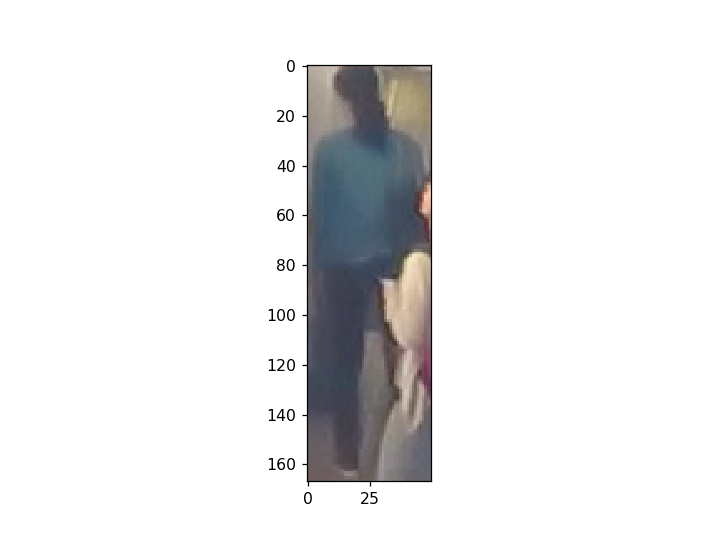

In [235]:

fig = plt.figure()




# Define a callback function that will update the textarea

class annotate:
    def __init__(self):
        self.iter= 0

    def __call__(self,event):
        coord.append(([event.xdata, event.ydata]))
        (img, box), idx = train_set.get_random()
        i.append(idx)
        bboxes.append(box)
        plt.imshow(img)
        self.iter+=1
    
    
    

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', annotate())
plt.imshow(img)

In [211]:
idx

245066

In [236]:
# plt.imshow(img)
print(coord, i)

print(box)

print(list(box))

print(list(box[:2])+list(box[2:]+box[:2]))


[[37.73421904328583, 26.482595666662434], [9.340173201127492, 28.076915625369907], [12.731700104552424, 9.155536684639017], [36.50253442871622, 16.584379666811458], [15.688244955880307, 8.844494955880307], [33.70206689215327, 11.215865593451952], [136.5972663417009, 97.66504231572662], [88.3342860828746, 38.51042244651103], [29.207740965343675, 24.045538584391267], [24.77360059069352, 17.198384140477003], [19.7287249049067, 27.03170015079118], [48.382720600474926, 22.559881846110045]] [179610, 382831, 61346, 36524, 81892, 285442, 89816, 134263, 3828, 287793, 21505, 270425, 339113]
[404. 120.  74. 204.]
[404.0, 120.0, 74.0, 204.0]
[404.0, 120.0, 478.0, 324.0]


In [241]:
print(len(coord), len(i), len(bboxes))

# np.save('coord',np.array(coord))
# np.save('idx',np.array(i))
# np.save('boxes',np.array(bboxes))


544 545 545


In [248]:
print(np.array(coord), np.array(bboxes)[:-2,2:])
print(np.array(coord).shape, np.array(bboxes)[:-1,2:].shape)

[[37.73421904 26.48259567]
 [ 9.3401732  28.07691563]
 [12.7317001   9.15553668]
 ...
 [19.28092028 24.19557471]
 [53.27077567 23.5071322 ]
 [37.12616712 22.20263555]] [[ 74. 204.]
 [ 23.  70.]
 [ 24.  73.]
 ...
 [ 49. 154.]
 [ 40. 106.]
 [113. 268.]]
(544, 2) (544, 2)


In [251]:
coord_n = np.array(coord)
bboxes_n = np.array(bboxes)[:-1,2:]
ratios = 100*coord_n/bboxes_n
print(ratios)

[[50.9921879  12.98166454]
 [40.6094487  40.10987946]
 [53.04875044 12.54183107]
 ...
 [48.20230071 22.82601387]
 [47.14227935  8.77131798]
 [44.19781799  9.28980567]]


<IPython.core.display.Javascript object>


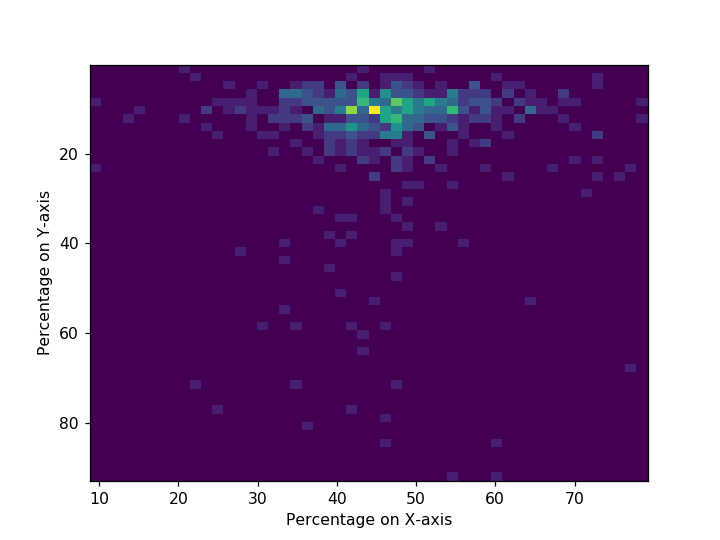

In [257]:
plt.figure()
plt.hist2d(ratios[:,0], ratios[:,1],bins=50)
plt.xlabel('Percentage on X-axis')
plt.ylabel('Percentage on Y-axis')
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


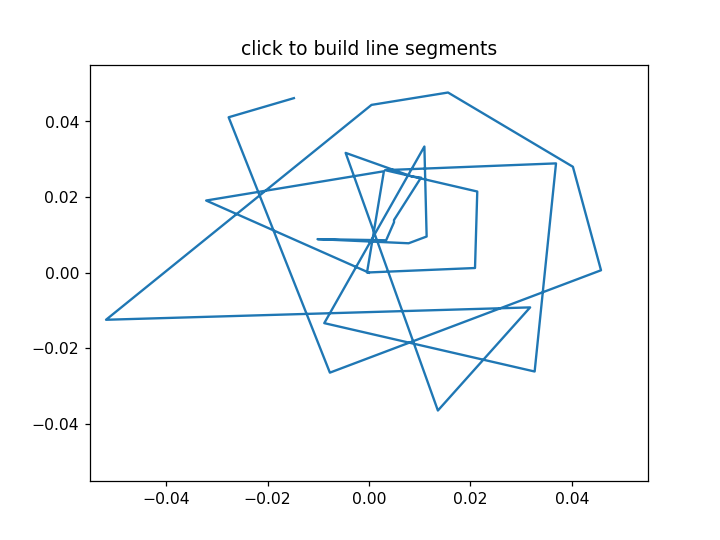

In [184]:
from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()

In [106]:
img.size

(1920, 1080)

In [84]:
import math 
from PIL import Image, ImageDraw 
  
w, h = 220, 190
# shape = [(40, 40), (w - 10, h - 10)] 
shape = np.array([40,40,50,50.])
  
# creating new Image object 
img = Image.new("RGB", (w, h)) 
  
# create rectangle image 
img1 = ImageDraw.Draw(img)   
img1.rectangle(shape,outline ="red") 
img.show() 

TypeError: coordinate list must contain exactly 2 coordinates

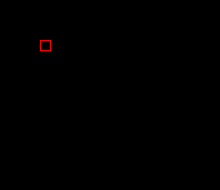

In [78]:
img

In [113]:
train_scenes

['../Datasets/2DMOT2015/train/TUD-Campus',
 '../Datasets/2DMOT2015/train/PETS09-S2L1',
 '../Datasets/2DMOT2015/train/Venice-2',
 '../Datasets/2DMOT2015/train/KITTI-17',
 '../Datasets/2DMOT2015/train/TUD-Stadtmitte',
 '../Datasets/2DMOT2015/train/ETH-Sunnyday',
 '../Datasets/2DMOT2015/train/KITTI-13',
 '../Datasets/2DMOT2015/train/ADL-Rundle-6',
 '../Datasets/2DMOT2015/train/ETH-Pedcross2',
 '../Datasets/2DMOT2015/train/ETH-Bahnhof',
 '../Datasets/2DMOT2015/train/ADL-Rundle-8',
 '../Datasets/MOT2017/train/MOT17-09-FRCNN',
 '../Datasets/MOT2017/train/MOT17-05-FRCNN',
 '../Datasets/MOT2017/train/MOT17-13-FRCNN',
 '../Datasets/MOT2017/train/MOT17-02-FRCNN',
 '../Datasets/MOT2017/train/MOT17-10-DPM',
 '../Datasets/MOT2017/train/MOT17-11-DPM',
 '../Datasets/MOT2017/train/MOT17-13-DPM',
 '../Datasets/MOT2017/train/MOT17-09-DPM',
 '../Datasets/MOT2017/train/MOT17-11-SDP',
 '../Datasets/MOT2017/train/MOT17-10-SDP',
 '../Datasets/MOT2017/train/MOT17-05-DPM',
 '../Datasets/MOT2017/train/MOT17-02-

In [121]:
temp = os.listdir('../Datasets/MOT2017/train/MOT17-02-DPM'+'/img1')
temp.sort()
print(temp)

['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '000071.jpg', '0000